**This notebook visualizes the values of the LM damping factors learned by PixLoc (Figure 8).**

In [1]:
%load_ext autoreload
%autoreload 2

import torch
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from pixloc.pixlib.utils.experiments import load_experiment
from pixloc import run_CMU, run_Aachen,run_scripts

# Read the damping values from the checkpoints

In [2]:
experiments = {
    'CMU': run_CMU.experiment,
    'MD': run_Aachen.experiment,
    '3P':run_scripts.experiment,
}
dampings = {}
for k, exper in experiments.items():
    print('Exeperiment', exper)
    optimizer = load_experiment(exper).eval().optimizer
    dampings[k] = []
    for i in range(3):
        with torch.no_grad():
            damp = optimizer[i].dampingnet().cpu().numpy()
        print(damp)
        dampings[k].append(damp)

[03/17/2023 13:50:17 pixloc.pixlib.utils.experiments INFO] Loading checkpoint checkpoint_best.tar


Exeperiment pixloc_cmu


[03/17/2023 13:50:24 pixloc.pixlib.utils.experiments INFO] Loading checkpoint checkpoint_best.tar


[2.6220421e-06 1.9487187e-01 2.7632403e-05 5.9678365e-02 3.9695697e-06
 1.9973192e-01]
[2.7728197e-06 1.5658145e+00 2.1363121e-06 9.5236965e-04 2.6703519e-06
 1.2797195e+00]
[1.4191820e-06 7.8969780e+01 7.8280809e-06 1.6465056e+00 9.1288149e-01
 3.5898445e+01]
Exeperiment pixloc_megadepth


[03/17/2023 13:50:30 pixloc.pixlib.utils.experiments INFO] Loading checkpoint checkpoint_best.tar


[0.00752234 0.04603482 0.10710011 0.02939763 0.00580256 0.10944298]
[0.00230701 0.01783912 0.06447375 0.00187383 0.00131778 0.37245804]
[ 1.7751114   8.382447    2.755696    0.0809486   0.07561994 22.015648  ]
Exeperiment pixloc_cmu
[2.6220421e-06 1.9487187e-01 2.7632403e-05 5.9678365e-02 3.9695697e-06
 1.9973192e-01]
[2.7728197e-06 1.5658145e+00 2.1363121e-06 9.5236965e-04 2.6703519e-06
 1.2797195e+00]
[1.4191820e-06 7.8969780e+01 7.8280809e-06 1.6465056e+00 9.1288149e-01
 3.5898445e+01]


# Plot the values at the coarse level

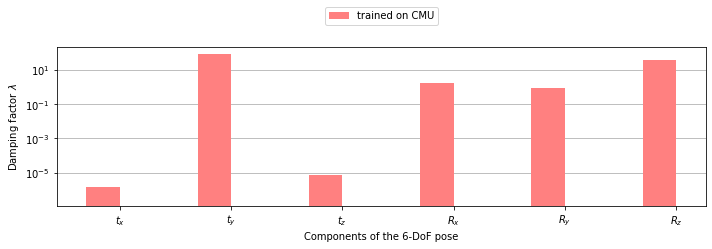

In [3]:
mpl.rc('font', size=14)
plt.figure(figsize=(10, 3))
w = 0.3  # bar width
idx = -1  # coarse level

args = dict(width=w, zorder=10)
plt.bar(np.arange(6)-w/2, dampings['CMU'][idx], color=(1, .5, .5), label='trained on CMU', **args)
# plt.bar(np.arange(6)+w/2, dampings['MD'][idx], color='#5fa7d9', label='trained on MegaDepth', **args)
# plt.bar(np.arange(6)+w/2, dampings['3P'][idx], color=(.7, .5, .5), label='trained on MegaDepth', **args)

plt.xlabel('Components of the 6-DoF pose')
plt.xticks(range(6), ('$t_x$', '$t_y$', '$t_z$', '$R_x$', '$R_y$', '$R_z$'))

plt.yscale('log')
plt.ylabel('Damping factor $\lambda$')
plt.ylim([1.1e-7, 200])
plt.tight_layout()
plt.grid(axis='y')
plt.gca().set_zorder(20)
plt.legend(ncol=2, bbox_to_anchor=(0.5, 1.2), loc='center');

# plt.savefig('learned_damping_factors.pdf', bbox_inches='tight', pad_inches=0)